<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/aeda.png" style="height: 100px;" align=right>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("BrBG")

import warnings
warnings.filterwarnings("ignore")

In [2]:

data = pd.read_csv("../data/telecom_churn.csv")

# 2. Look at the head of the data

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1m,110,$45.07,197.4m,99,$16.78,244.7m,91.0,$11.01,10.0m,3.0,$2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6m,123,$27.47,195.5m,103,$16.62,254.4m,103.0,$11.45,13.7m,3.0,$3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4m,114,$41.38,121.2m,110,$10.30,162.6m,104.0,$7.32,12.2m,5.0,$3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4m,71,$50.90,61.9m,88,$5.26,196.9m,89.0,$8.86,6.6m,7.0,$1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7m,113,$28.34,148.3m,122,$12.61,186.9m,121.0,$8.41,10.1m,3.0,$2.73,3.0,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3411 non-null   object 
 1   Account length          3411 non-null   int64  
 2   Area code               3411 non-null   int64  
 3   International plan      3411 non-null   object 
 4   Voice mail plan         3411 non-null   object 
 5   Number vmail messages   945 non-null    float64
 6   Total day minutes       3411 non-null   object 
 7   Total day calls         3411 non-null   int64  
 8   Total day charge        3411 non-null   object 
 9   Total eve minutes       3411 non-null   object 
 10  Total eve calls         3411 non-null   int64  
 11  Total eve charge        3411 non-null   object 
 12  Total night minutes     3411 non-null   object 
 13  Total night calls       3340 non-null   float64
 14  Total night charge      3411 non-null   

In [5]:
data.describe()

,Account length,Area code,Number vmail messages,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls
count,3411.000000,3411.000000,945.000000,3411.000000,3411.000000,3340.000000,3391.000000,2695.000000
mean,100.959543,437.368514,29.251852,100.509821,100.136617,100.101198,4.508699,1.977365
std,39.782290,42.470455,7.571975,20.099317,19.887516,19.747658,2.441619,1.172821
min,1.000000,408.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000
25%,74.000000,411.500000,24.000000,87.000000,87.000000,86.000000,3.000000,1.000000
50%,100.000000,415.000000,29.000000,101.000000,100.000000,101.000000,4.000000,2.000000
75%,127.000000,510.000000,34.000000,114.000000,114.000000,114.000000,6.000000,3.000000
max,243.000000,510.000000,51.000000,165.000000,170.000000,175.000000,20.000000,9.000000


In [6]:
data.shape

(3411, 20)

In [7]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
# Duplicate Data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3406     True
3407     True
3408     True
3409     True
3410     True
Length: 3411, dtype: bool

In [9]:
data = data.drop_duplicates()
display(data)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1m,110,$45.07,197.4m,99,$16.78,244.7m,91.0,$11.01,10.0m,3.0,$2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6m,123,$27.47,195.5m,103,$16.62,254.4m,103.0,$11.45,13.7m,3.0,$3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4m,114,$41.38,121.2m,110,$10.30,162.6m,104.0,$7.32,12.2m,5.0,$3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4m,71,$50.90,61.9m,88,$5.26,196.9m,89.0,$8.86,6.6m,7.0,$1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7m,113,$28.34,148.3m,122,$12.61,186.9m,121.0,$8.41,10.1m,3.0,$2.73,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36.0,156.2m,77,$26.55,215.5m,126,$18.32,279.1m,83.0,$12.56,9.9m,6.0,$2.67,2.0,False
3329,WV,68,415,No,No,NaN,231.1m,57,$39.29,153.4m,55,$13.04,191.3m,123.0,$8.61,9.6m,4.0,$2.59,3.0,False
3330,RI,28,510,No,No,NaN,180.8m,109,$30.74,288.8m,58,$24.55,191.9m,91.0,$8.64,14.1m,6.0,$3.81,2.0,False
3331,CT,184,510,Yes,No,NaN,213.8m,105,$36.35,159.6m,84,$13.57,139.2m,137.0,$6.26,5.0m,10.0,$1.35,2.0,False


In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [11]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1m,110,$45.07,197.4m,99,$16.78,244.7m,91.0,$11.01,10.0m,3.0,$2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6m,123,$27.47,195.5m,103,$16.62,254.4m,103.0,$11.45,13.7m,3.0,$3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4m,114,$41.38,121.2m,110,$10.30,162.6m,104.0,$7.32,12.2m,5.0,$3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4m,71,$50.90,61.9m,88,$5.26,196.9m,89.0,$8.86,6.6m,7.0,$1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7m,113,$28.34,148.3m,122,$12.61,186.9m,121.0,$8.41,10.1m,3.0,$2.73,3.0,False


In [12]:
data['Total day minutes'] = data['Total day minutes'].str.replace('m', '')
data['Total day charge'] = data['Total day charge'].str.replace('$', '')
data['Total eve minutes'] = data['Total eve minutes'].str.replace('m', '')
data['Total eve charge'] = data['Total eve charge'].str.replace('$', '')
data['Total night minutes'] = data['Total night minutes'].str.replace('m', '')
data['Total night charge'] = data['Total night charge'].str.replace('$', '')
data['Total intl minutes'] = data['Total intl minutes'].str.replace('m', '')
data['Total intl charge'] = data['Total intl charge'].str.replace('$', '')

In [13]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107,415,No,Yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137,415,No,No,NaN,243.4,114,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5.0,3.29,NaN,False
3,OH,84,408,Yes,No,NaN,299.4,71,50.90,61.9,88,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75,415,Yes,No,NaN,166.7,113,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   922 non-null    float64
 6   Total day minutes       3333 non-null   object 
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   object 
 9   Total eve minutes       3333 non-null   object 
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   object 
 12  Total night minutes     3333 non-null   object 
 13  Total night calls       3264 non-null   float64
 14  Total night charge      3333 non-null   

In [15]:
data['Total day minutes'] = data['Total day minutes'].astype(float)
data['Total day charge'] = data['Total day charge'].astype(float)
data['Total eve minutes'] = data['Total eve minutes'].astype(float)
data['Total eve charge'] = data['Total eve charge'].astype(float)
data['Total night minutes'] = data['Total night minutes'].astype(float)
data['Total night charge'] = data['Total night charge'].astype(float)
data['Total intl minutes'] = data['Total intl minutes'].astype(float)
data['Total intl charge'] = data['Total intl charge'].astype(float)


# data['Number vmail messages'] = data['Number vmail messages'].astype(int)
# data['Customer service calls'] = data['Customer service calls'].astype(int)
# data['Total intl calls'] = data['Total intl calls'].astype(int)
# data['Total night calls'] = data['Total night calls'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   922 non-null    float64
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3264 non-null   float64
 14  Total night charge      3333 non-null   

In [17]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,922.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3264.000000,3333.000000,3333.000000,3315.000000,3333.000000,2636.000000
mean,101.064806,437.182418,29.277657,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.109988,9.039325,10.237294,4.503771,2.764581,1.976100
std,39.822106,42.371290,7.559027,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.774421,2.275873,2.791840,2.445588,0.753773,1.171044
min,1.000000,408.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,1.000000,0.000000,1.000000
25%,74.000000,408.000000,24.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,29.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,101.000000,9.050000,10.300000,4.000000,2.780000,2.000000
75%,127.000000,510.000000,34.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,114.000000,10.590000,12.100000,6.000000,3.270000,3.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
data.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [19]:
data.isnull()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
data.isna().sum()

State                        0
Account length               0
Area code                    0
International plan           0
Voice mail plan              0
Number vmail messages     2411
Total day minutes            0
Total day calls              0
Total day charge             0
Total eve minutes            0
Total eve calls              0
Total eve charge             0
Total night minutes          0
Total night calls           69
Total night charge           0
Total intl minutes           0
Total intl calls            18
Total intl charge            0
Customer service calls     697
Churn                        0
dtype: int64

In [21]:
data = data.drop(columns=['Number vmail messages'])

In [22]:
data = data.dropna()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 0 to 3331
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2566 non-null   object 
 1   Account length          2566 non-null   int64  
 2   Area code               2566 non-null   int64  
 3   International plan      2566 non-null   object 
 4   Voice mail plan         2566 non-null   object 
 5   Total day minutes       2566 non-null   float64
 6   Total day calls         2566 non-null   int64  
 7   Total day charge        2566 non-null   float64
 8   Total eve minutes       2566 non-null   float64
 9   Total eve calls         2566 non-null   int64  
 10  Total eve charge        2566 non-null   float64
 11  Total night minutes     2566 non-null   float64
 12  Total night calls       2566 non-null   float64
 13  Total night charge      2566 non-null   float64
 14  Total intl minutes      2566 non-null   

In [24]:
data.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [25]:
data

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,265.1,110,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107,415,No,Yes,161.6,123,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
3,OH,84,408,Yes,No,299.4,71,50.90,61.9,88,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75,415,Yes,No,166.7,113,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False
6,MA,121,510,No,Yes,218.2,88,37.09,348.5,108,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,No,No,134.7,98,22.90,189.7,68,16.12,221.4,128.0,9.96,11.8,5.0,3.19,2.0,False
3328,AZ,192,415,No,Yes,156.2,77,26.55,215.5,126,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False
3329,WV,68,415,No,No,231.1,57,39.29,153.4,55,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False
3330,RI,28,510,No,No,180.8,109,30.74,288.8,58,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False


In [26]:
# number of churn and non-churn customers
data['Churn'].value_counts()

False    2186
True      380
Name: Churn, dtype: int64

In [27]:
# percentage of churn and non-churn customers
data['Churn'].value_counts(normalize=True)*100

False    85.190959
True     14.809041
Name: Churn, dtype: float64

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

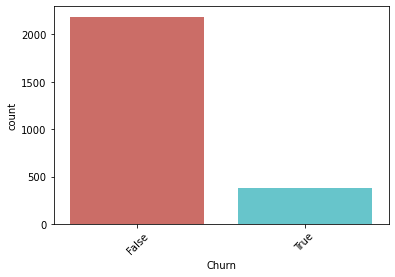

In [28]:
sns.countplot(x = 'Churn', data = data, palette = 'hls')
plt.xticks(rotation=45)

In [29]:
data.groupby('Churn')['Total day minutes'].mean()

Churn
False    175.367658
True     201.372895
Name: Total day minutes, dtype: float64

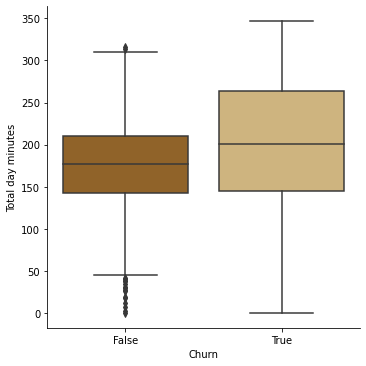

In [30]:
sns.catplot(
    data=data,
    x="Churn",
    y="Total day minutes",
    kind="box",
);

In [31]:
data.groupby('Churn').mean().T

Churn,False,True
Account length,100.702196,103.121053
Area code,437.142726,437.518421
Total day minutes,175.367658,201.372895
Total day calls,99.990393,101.684211
Total day charge,29.812978,34.234053
Total eve minutes,198.926441,211.965789
Total eve calls,100.043001,100.857895
Total eve charge,16.908971,18.017211
Total night minutes,199.880924,203.954211
Total night calls,100.130833,101.044737


No     2331
Yes     235
Name: International plan, dtype: int64


<AxesSubplot:xlabel='International plan', ylabel='count'>

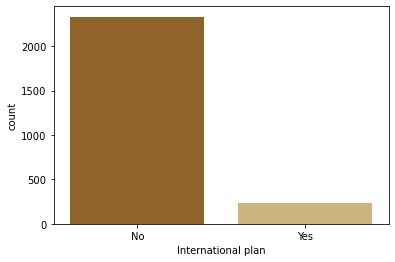

In [32]:
print(data['International plan'].value_counts())
sns.countplot(x="International plan", data=data)

International plan
No     10.227756
Yes    10.581277
Name: Total intl minutes, dtype: float64


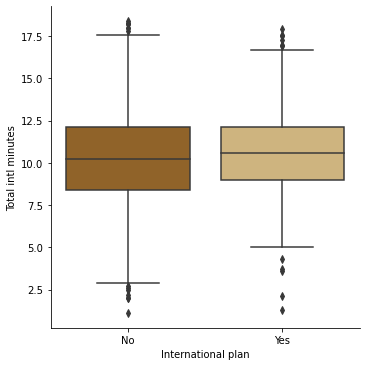

In [33]:
print(data.groupby('International plan')['Total intl minutes'].mean())
sns.catplot(
    data=data,
    x="International plan",
    y="Total intl minutes",
    kind="box",
);

International plan
No     4.501502
Yes    4.625532
Name: Total intl calls, dtype: float64


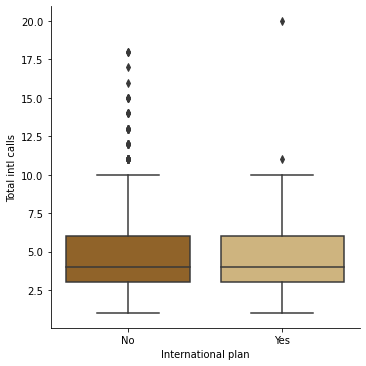

In [34]:
print(data.groupby('International plan')['Total intl calls'].mean())
sns.catplot(
    data=data,
    x="International plan",
    y="Total intl calls",
    kind="box",
);

International plan
No     2.762025
Yes    2.857362
Name: Total intl charge, dtype: float64


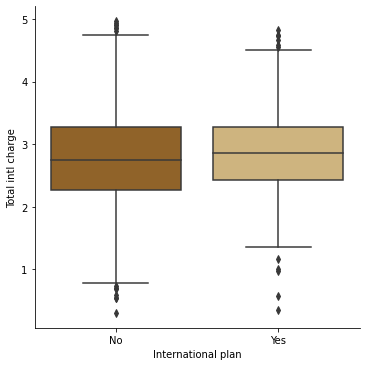

In [35]:
print(data.groupby('International plan')['Total intl charge'].mean())
sns.catplot(
    data=data,
    x="International plan",
    y="Total intl charge",
    kind="box",
);

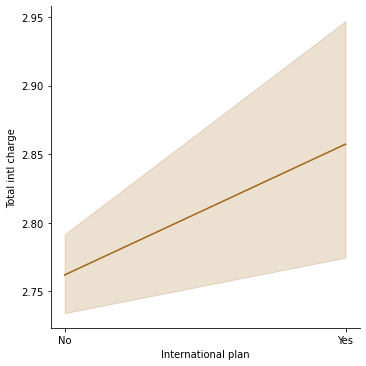

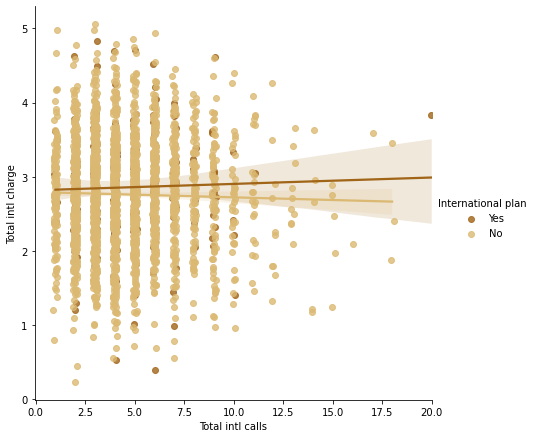

In [36]:
sns.relplot(data=data, x="International plan", y="Total intl charge", kind="line")
sns.lmplot(x='Total intl calls', y='Total intl charge', hue='International plan',hue_order=['Yes', 'No'], x_jitter=0.1, y_jitter=0.1, height=6, data=data)

In [37]:
data[(data["Churn"] == False) & (data["International plan"] == "No")]['Total intl minutes'].max()

18.4

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

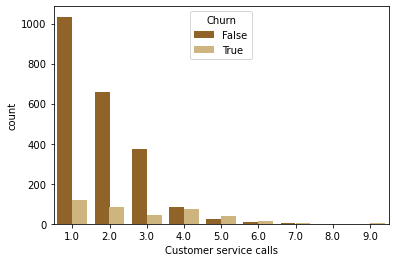

In [38]:
sns.countplot(x="Customer service calls", hue="Churn", data=data)

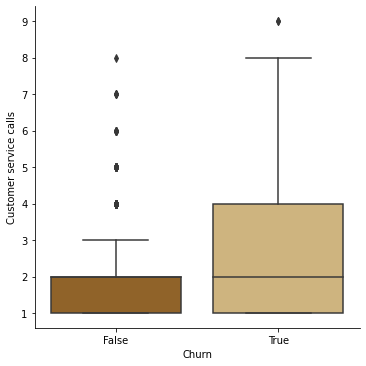

In [39]:
sns.catplot(
    data=data,
    x="Churn",
    y="Customer service calls",
    kind="box",
);

In [40]:
data['State'].value_counts()

WV    87
MN    66
NY    66
OR    65
WY    60
AL    60
WI    59
VA    59
ID    57
IN    57
MT    57
CT    57
MI    56
NV    55
TX    55
VT    54
KS    54
MS    54
NM    54
UT    54
OH    53
ND    53
NJ    52
NC    52
OK    51
MD    51
ME    51
MO    51
CO    50
WA    50
AZ    49
DE    49
KY    47
SD    47
FL    46
AR    45
GA    44
NE    44
NH    43
RI    42
SC    42
MA    41
TN    40
LA    40
DC    40
IL    40
AK    39
HI    39
IA    35
PA    32
CA    22
Name: State, dtype: int64

In [41]:
total_cust = data['State'].value_counts()
total_cust
 
cust_churn = data.groupby('State')['Churn'].agg('sum')
cust_churn

churn_rate = cust_churn/total_cust
print(churn_rate)
i = churn_rate.idxmax()
print("State that has the highest churn rates:",i,churn_rate.max())

AK    0.076923
AL    0.100000
AR    0.222222
AZ    0.061224
CA    0.181818
CO    0.140000
CT    0.140351
DC    0.100000
DE    0.102041
FL    0.152174
GA    0.136364
HI    0.051282
IA    0.085714
ID    0.157895
IL    0.075000
IN    0.157895
KS    0.185185
KY    0.127660
LA    0.075000
MA    0.170732
MD    0.274510
ME    0.176471
MI    0.214286
MN    0.196970
MO    0.117647
MS    0.222222
MT    0.228070
NC    0.173077
ND    0.075472
NE    0.090909
NH    0.186047
NJ    0.288462
NM    0.111111
NV    0.236364
NY    0.196970
OH    0.094340
OK    0.098039
OR    0.138462
PA    0.218750
RI    0.119048
SC    0.238095
SD    0.127660
TN    0.125000
TX    0.218182
UT    0.166667
VA    0.050847
VT    0.148148
WA    0.200000
WI    0.084746
WV    0.103448
WY    0.100000
dtype: float64
State that has the highest churn rates: NJ 0.28846153846153844


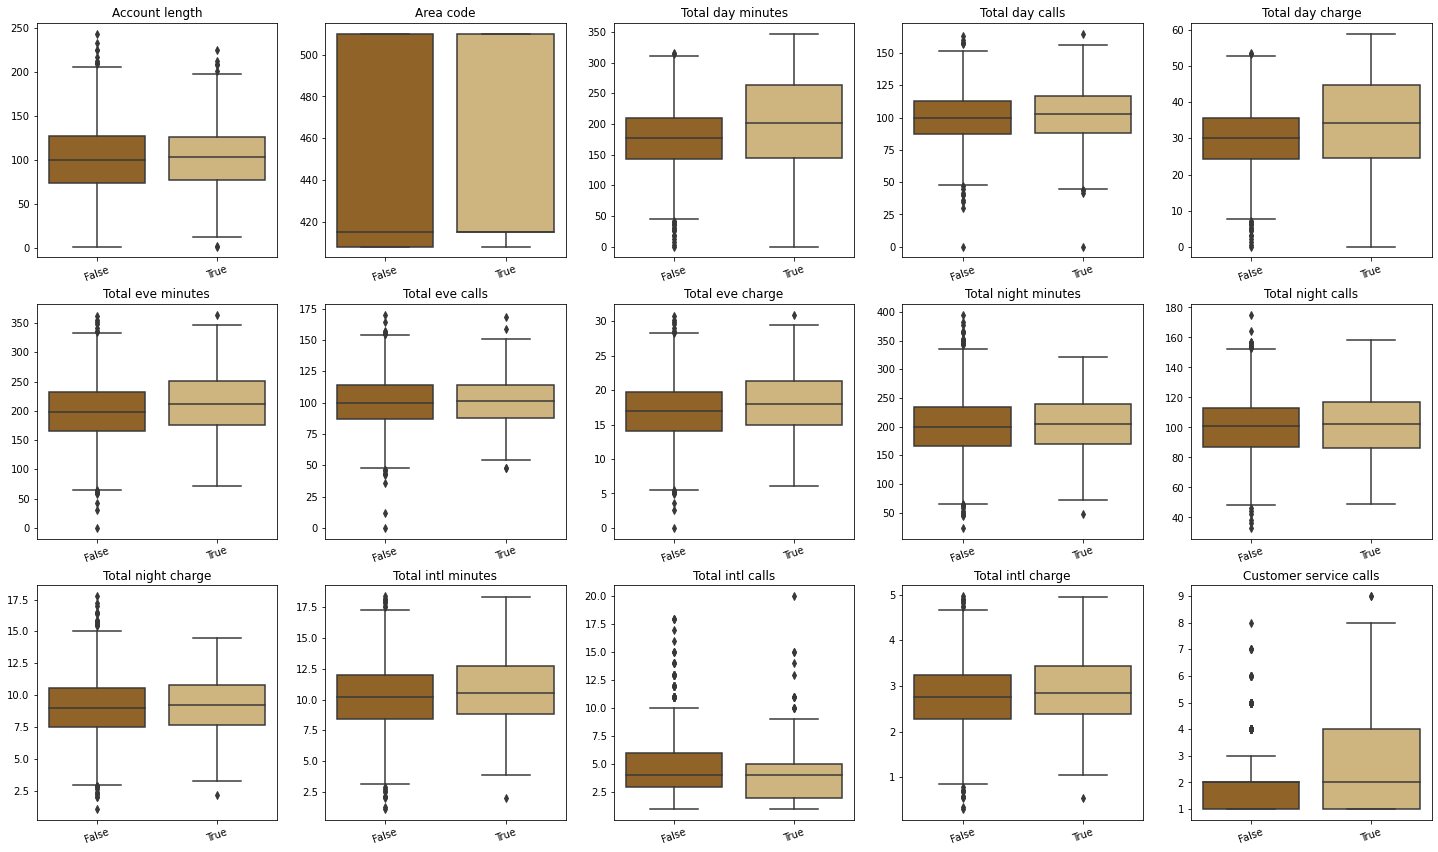

In [42]:
num = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
data_num = data[num]
 
fig = plt.figure(figsize = (25, 25))
 
i = 1
for n in data_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = data[n], data = data, x='Churn')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

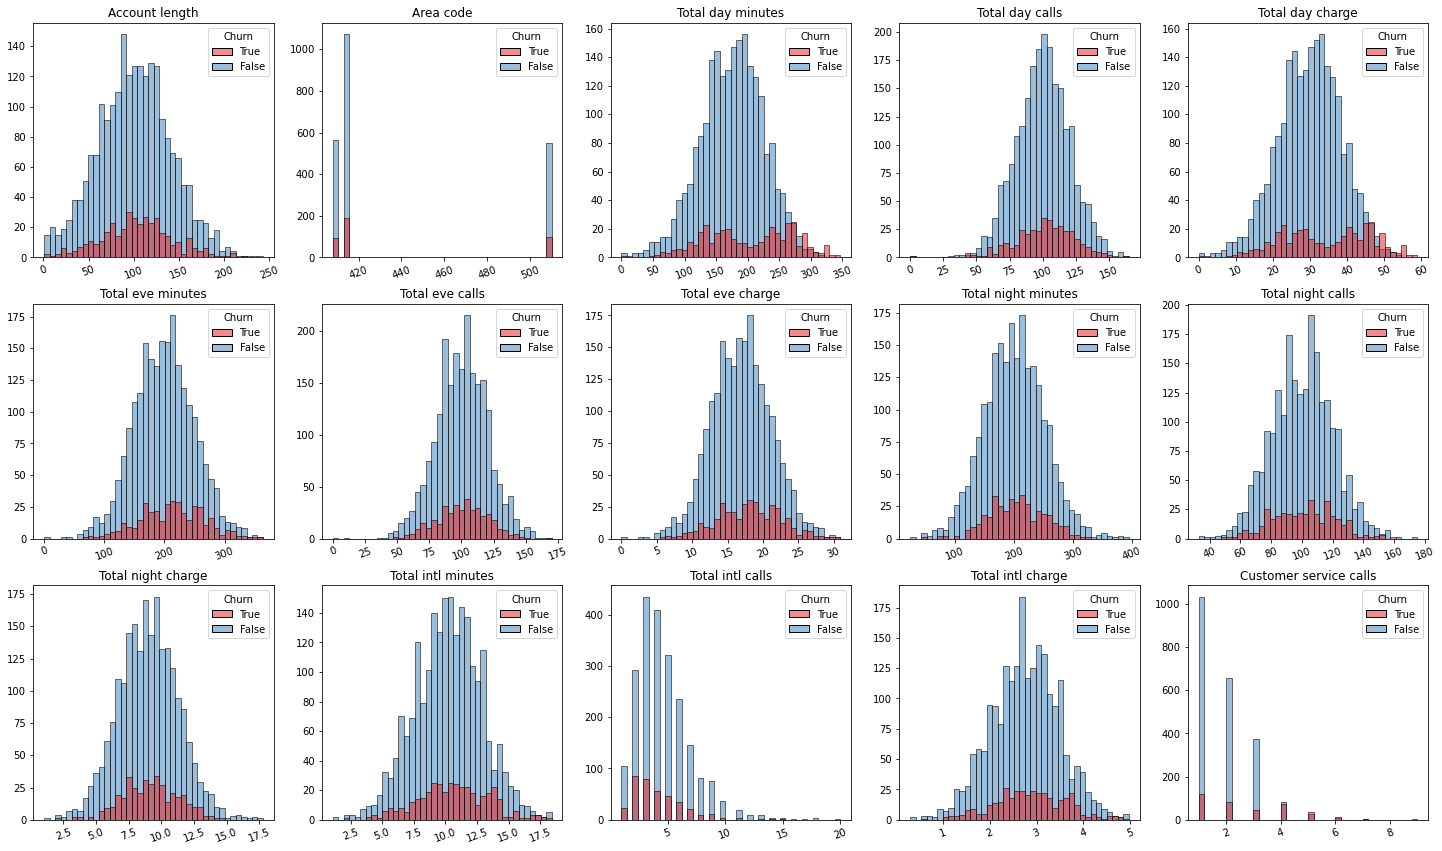

In [43]:
sns.set_palette("Set1")

num = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
data_num = data[num]
 
fig = plt.figure(figsize = (25, 25))
 
i = 1
for n in data_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = data[n], hue = data["Churn"], hue_order = [True,False], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

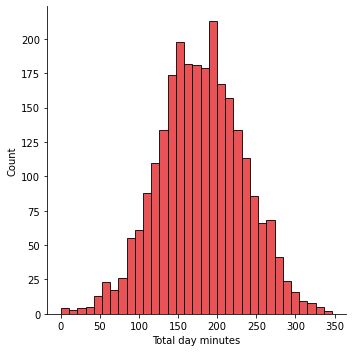

In [44]:
sns.displot(x="Total day minutes", hue_order = [True,False], data=data)

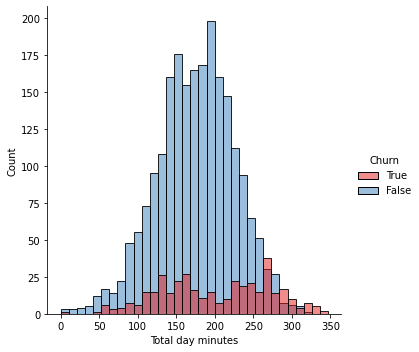

In [45]:
sns.displot(x="Total day minutes", hue = "Churn", hue_order = [True,False], data=data)

Text(0.5, 1.0, 'IRIS: Correlation between Numerical Columns')

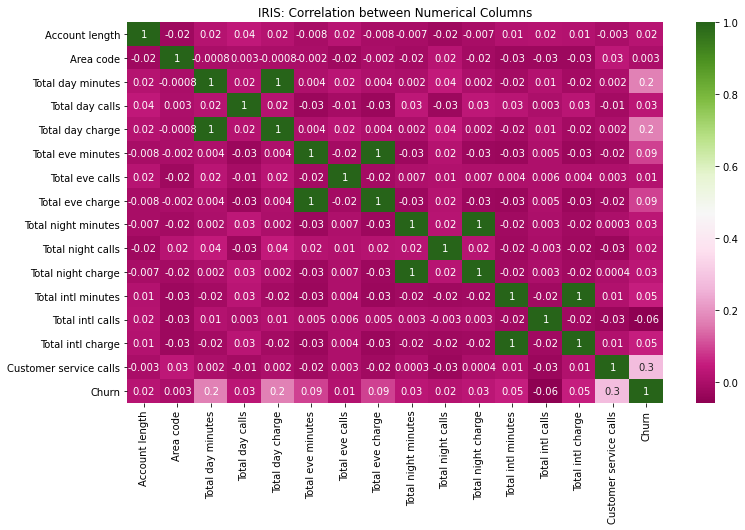

In [46]:
corr_matrix = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap="PiYG", annot=True, square=False, fmt=".1g")
plt.title("IRIS: Correlation between Numerical Columns")

In [47]:
def compare_pop_sample(pop_df, sample_df, col): 
    pop = pop_df[col].value_counts(normalize = True)
    sample = sample_df[col].value_counts(normalize = True)
    pop_sample = pd.concat([pop, sample], 
                           axis = 0, 
                           keys = ["pop", "sample"]).reset_index()
    sns.catplot(x = "level_1", y = col, 
                hue = "level_0", kind = "bar", 
                data = pop_sample)

In [48]:
np.random.seed(42)
datasample = data.sample(n = 250, replace = False)

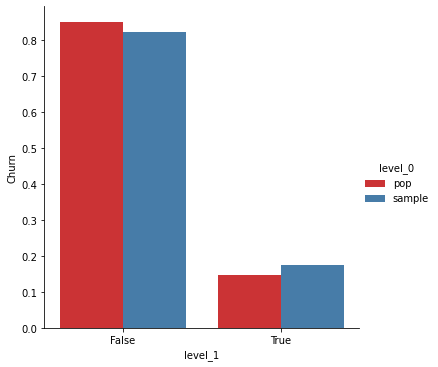

In [49]:
compare_pop_sample(data, datasample, "Churn")

In [50]:
datasample1 = data.groupby('State').\
apply(lambda x: x.sample(frac = .08, random_state = 42, replace=False))

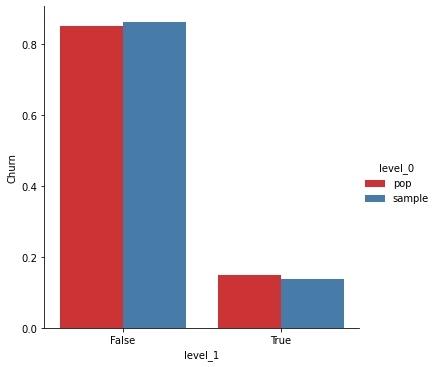

In [51]:
compare_pop_sample(data, datasample1, "Churn")

In [52]:
len(datasample1)

204

In [53]:
data.State.unique()

array(['KS', 'OH', 'OK', 'MA', 'LA', 'IN', 'IA', 'MT', 'NY', 'ID', 'VT',
       'VA', 'TX', 'CO', 'SC', 'NE', 'HI', 'IL', 'NH', 'AZ', 'GA', 'AK',
       'NJ', 'AR', 'WI', 'OR', 'MI', 'DE', 'WY', 'UT', 'CA', 'MN', 'SD',
       'NC', 'WA', 'NM', 'NV', 'MD', 'WV', 'KY', 'DC', 'ME', 'MS', 'AL',
       'MO', 'FL', 'RI', 'PA', 'TN', 'CT', 'ND'], dtype=object)

In [54]:
np.random.seed(42)
clusters = np.random.choice(data.State.unique(), 
                            size = 5, 
                            replace = False)

clusters

array(['AL', 'DC', 'RI', 'TX', 'WI'], dtype=object)

In [55]:
datasample2 = data[data.State.isin(clusters)]
datasample2.head()

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
19,TX,73,415,No,No,224.4,90,38.15,159.5,88,13.56,192.8,74.0,8.68,13.0,2.0,3.51,1.0,False
44,WI,64,510,No,No,154.0,67,26.18,225.8,118,19.19,265.3,86.0,11.94,3.5,3.0,0.95,1.0,False
58,WI,68,415,No,No,148.8,70,25.30,246.5,164,20.95,129.8,103.0,5.84,12.1,3.0,3.27,3.0,False
84,TX,106,510,No,No,210.6,96,35.80,249.2,85,21.18,191.4,88.0,8.61,12.4,1.0,3.35,2.0,True
90,DC,82,510,No,No,143.9,61,24.46,194.9,105,16.57,109.6,94.0,4.93,11.1,2.0,3.00,1.0,False


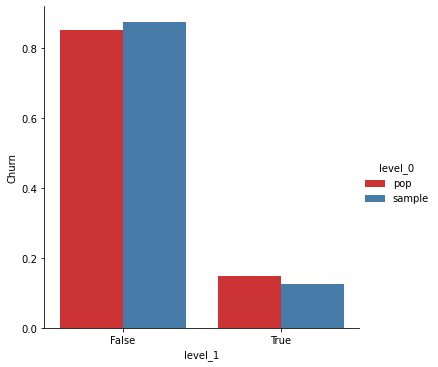

In [56]:
compare_pop_sample(data, datasample2, 'Churn')

In [57]:
len(datasample2)

256

In [58]:
np.random.seed(42)
start = np.random.choice(len(data), 1)
h, n = 35, 250
index = start + h * (np.arange(n))

datasample3 = data.iloc[index % len(data),]

datasample3

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1125,MT,111,408,No,No,142.3,75,24.19,122.8,106,10.44,229.5,94.0,10.33,12.8,9.0,3.46,2.0,False
1171,TX,32,408,No,No,157.9,88,26.84,180.8,132,15.37,132.5,102.0,5.96,12.8,3.0,3.46,1.0,False
1216,LA,95,415,No,No,141.1,84,23.99,211.4,108,17.97,103.7,127.0,4.67,5.9,6.0,1.59,3.0,False
1259,NH,55,408,No,Yes,189.3,95,32.18,118.6,113,10.08,250.2,102.0,11.26,12.5,4.0,3.38,2.0,False
1305,LA,89,415,No,No,141.1,92,23.99,249.1,126,21.17,136.0,73.0,6.12,10.8,2.0,2.92,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,RI,63,415,Yes,No,62.9,112,10.69,202.9,111,17.25,259.0,58.0,11.66,8.9,8.0,2.40,1.0,False
2302,WV,129,415,No,No,159.1,100,27.05,202.5,90,17.21,233.1,96.0,10.49,11.5,6.0,3.11,2.0,False
2344,CA,95,415,No,No,183.4,98,31.18,281.3,95,23.91,105.2,113.0,4.73,8.2,8.0,2.21,1.0,False
2395,CO,128,510,No,No,199.3,86,33.88,194.8,102,16.56,298.2,82.0,13.42,14.3,2.0,3.86,4.0,False


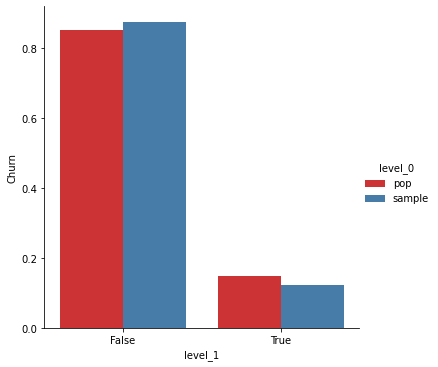

In [59]:
compare_pop_sample(data, datasample3, "Churn")

In [60]:
len(datasample3)

250

In [61]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [ ]:
# stage 1: simple random sample of clusters
np.random.seed(42)
clusters = np.random.choice(data.State.unique(), size = 5)
data_stage1 = data[data.State.isin(clusters)]
f=250/data_stage1.shape[0]

# stage 2: simple random sample
np.random.seed(42)
datasample5 = data_stage1.sample(n = 250, replace = False)

# stage 2: stratified sampling
# datasample4 = data.groupby('International plan').\
# apply(lambda x: x.sample(frac = .08, random_state = 42, replace=False))



datasample5

In [62]:
# stage 1: simple random sample of clusters
np.random.seed(42)
clusters = np.random.choice(data.State.unique(), size = 5)
data_stage1 = data[data.State.isin(clusters)]
f=250/data_stage1.shape[0]

# stage 2: simple random sample from 5 different states/clusters
np.random.seed(42)
datasample5 = data_stage1.sample(n = 250, replace = False)

datasample5

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2403,WV,21,415,No,No,91.9,109,15.62,198.4,111,16.86,171.7,125.0,7.73,13.0,7.0,3.51,2.0,False
3027,WV,101,415,No,Yes,220.3,96,37.45,285.8,72,24.29,203.0,111.0,9.14,9.4,6.0,2.54,4.0,False
1847,WY,54,408,No,Yes,143.9,73,24.46,210.3,117,17.88,129.2,117.0,5.81,12.5,8.0,3.38,2.0,False
126,MS,162,415,No,No,70.7,108,12.02,157.5,87,13.39,154.8,82.0,6.97,9.1,3.0,2.46,4.0,True
2729,WY,122,415,No,No,119.3,93,20.28,223.9,103,19.03,211.9,122.0,9.54,8.7,4.0,2.35,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,MT,71,510,No,Yes,175.7,82,29.87,258.9,136,22.01,268.4,154.0,12.08,14.1,7.0,3.81,1.0,False
2280,MS,38,415,No,Yes,142.4,106,24.21,313.7,109,26.66,126.6,117.0,5.70,13.4,6.0,3.62,2.0,False
2573,WV,124,415,No,No,312.0,112,53.04,180.0,109,15.30,168.6,94.0,7.59,12.8,4.0,3.46,1.0,True
2879,SC,1,415,No,Yes,146.6,68,24.92,172.8,67,14.69,173.8,113.0,7.82,10.0,2.0,2.70,1.0,False


In [63]:
datasample5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 2403 to 49
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   250 non-null    object 
 1   Account length          250 non-null    int64  
 2   Area code               250 non-null    int64  
 3   International plan      250 non-null    object 
 4   Voice mail plan         250 non-null    object 
 5   Total day minutes       250 non-null    float64
 6   Total day calls         250 non-null    int64  
 7   Total day charge        250 non-null    float64
 8   Total eve minutes       250 non-null    float64
 9   Total eve calls         250 non-null    int64  
 10  Total eve charge        250 non-null    float64
 11  Total night minutes     250 non-null    float64
 12  Total night calls       250 non-null    float64
 13  Total night charge      250 non-null    float64
 14  Total intl minutes      250 non-null    

In [64]:
clusters

array(['WV', 'WY', 'SC', 'MS', 'MT'], dtype=object)

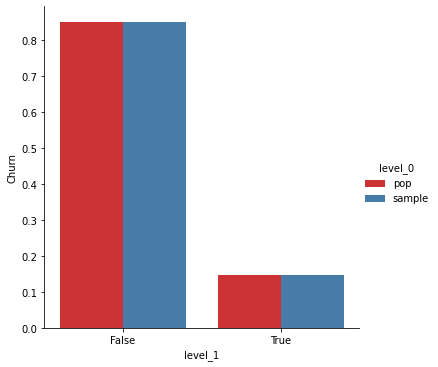

In [65]:
compare_pop_sample(data, datasample5, 'Churn' )

In [66]:
len(datasample5)

250